<a href="https://colab.research.google.com/github/Monica-Restrepo/Challenge1_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


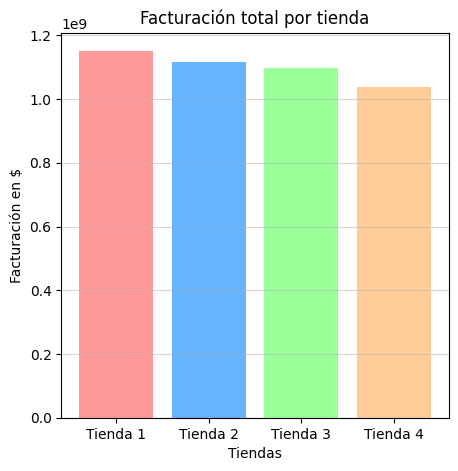

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Calculamos la facturación total de cada tienda
facturacion = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Mostramos los totales
for nombre, total in zip(nombres_tiendas, facturacion):
    print(f"{nombre}: ${total:,.2f}")

# Gráfico de barras
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(5,5))
plt.bar(nombres_tiendas, facturacion, color=colores)
plt.title('Facturación total por tienda')
plt.ylabel('Facturación en $')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

# 2. Ventas por categoría

Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


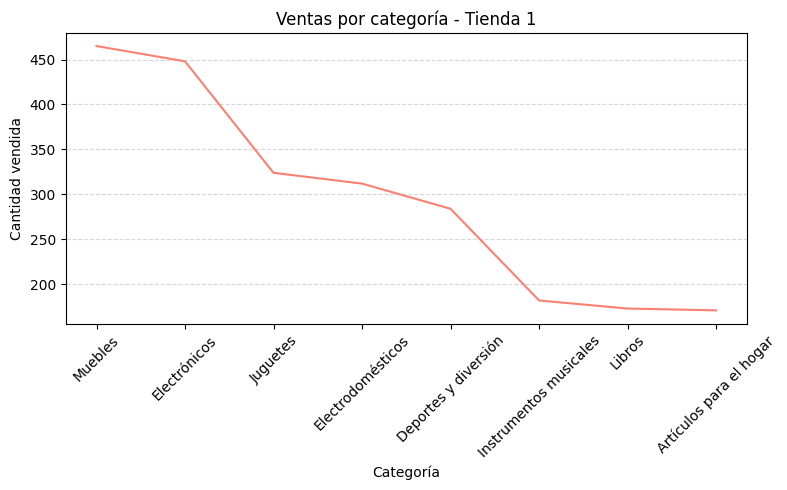

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


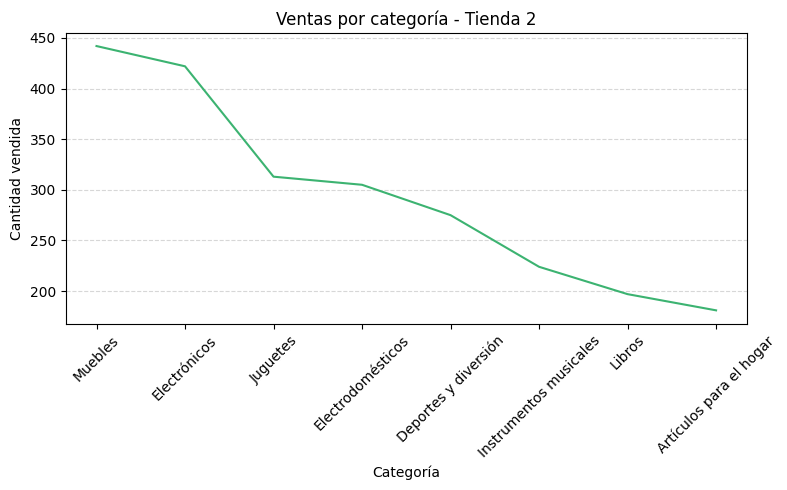

Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


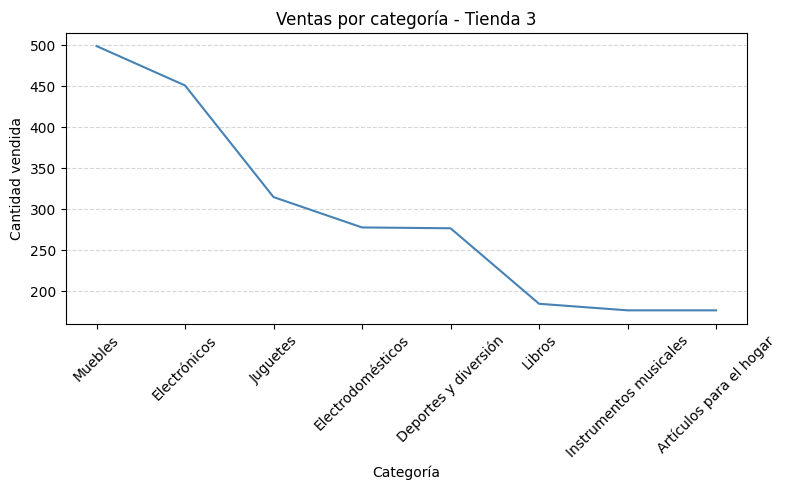

Ventas por categoría en Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


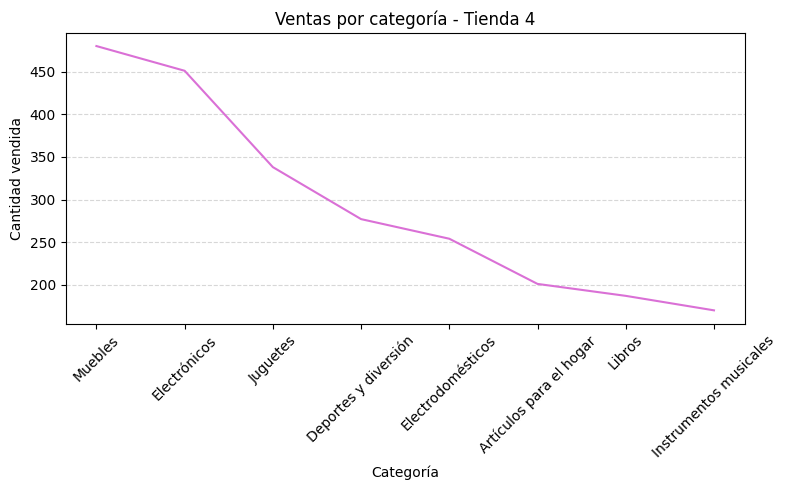

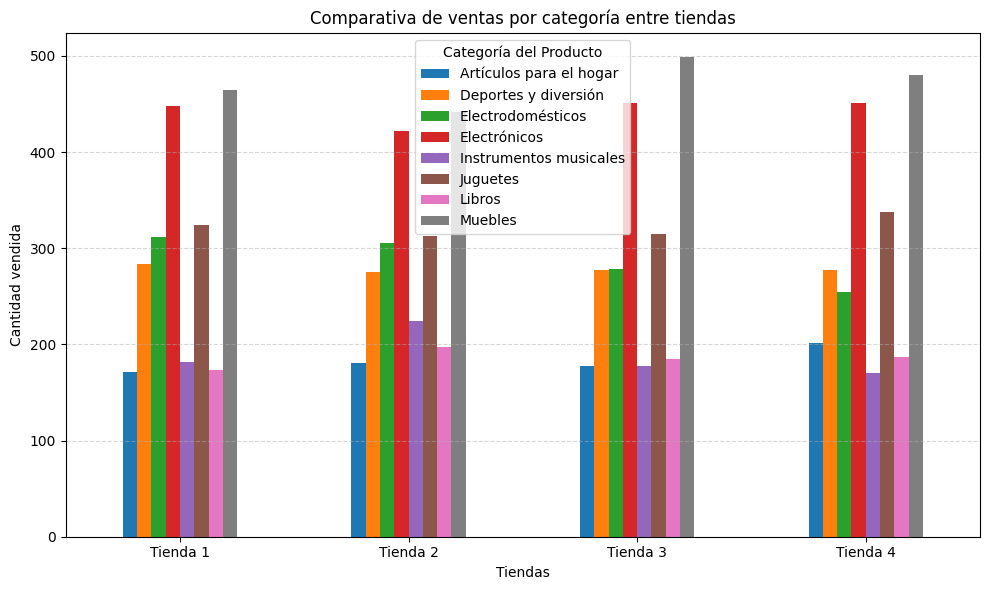

In [13]:
def analizar_ventas_categoria(df, nombres_tiendas, color='cornflowerblue'):

    ventas_por_categoria = df['Categoría del Producto'].value_counts()

    print(f"Ventas por categoría en {nombres_tiendas}:")
    print(ventas_por_categoria)

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    ventas_por_categoria.plot(kind='line', color=color)
    plt.title(f'Ventas por categoría - {nombres_tiendas}')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return ventas_por_categoria

ventas1 = analizar_ventas_categoria(tienda, "Tienda 1", 'salmon')
ventas2 = analizar_ventas_categoria(tienda2, "Tienda 2", 'mediumseagreen')
ventas3 = analizar_ventas_categoria(tienda3, "Tienda 3", 'steelblue')
ventas4 = analizar_ventas_categoria(tienda4, "Tienda 4", 'orchid')

# Creamos un DataFrame con los conteos
df_comparativo = pd.DataFrame({
    'Tienda 1': ventas1,
    'Tienda 2': ventas2,
    'Tienda 3': ventas3,
    'Tienda 4': ventas4
}).fillna(0)  # Rellena con 0 las categorías que no estén en todas

# Transponemos para que las tiendas estén en filas (opcional)
df_comparativo = df_comparativo.T

# Graficamos
df_comparativo.plot(kind='bar', figsize=(10,6))
plt.title("Comparativa de ventas por categoría entre tiendas")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


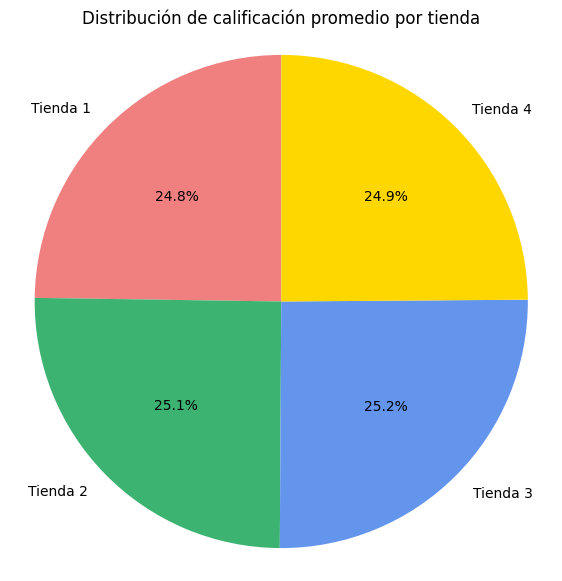

{'Tienda 1': np.float64(3.98),
 'Tienda 2': np.float64(4.04),
 'Tienda 3': np.float64(4.05),
 'Tienda 4': np.float64(4.0)}

In [24]:
def calificaciones_promedio(t1, t2, t3, t4):
    # Calculamos promedio
    prom1 = t1['Calificación'].mean()
    prom2 = t2['Calificación'].mean()
    prom3 = t3['Calificación'].mean()
    prom4 = t4['Calificación'].mean()

    print("Tienda 1: {:.2f}".format(prom1))
    print("Tienda 2: {:.2f}".format(prom2))
    print("Tienda 3: {:.2f}".format(prom3))
    print("Tienda 4: {:.2f}".format(prom4))

    # Almacenamos datos
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    promedios = [prom1, prom2, prom3, prom4]

    # Gráfico de pastel
    plt.figure(figsize=(7,7))
    colores = ['lightcoral', 'mediumseagreen', 'cornflowerblue', 'gold']
    plt.pie(promedios, labels=nombres, colors=colores, autopct='%1.1f%%', startangle=90)
    plt.title("Distribución de calificación promedio por tienda")
    plt.axis('equal')  # Hace el círculo "circular"
    plt.show()

    # También devolvemos los promedios si quieres analizarlos después
    return dict(zip(nombres, [round(p, 2) for p in promedios]))

calificaciones_promedio(tienda, tienda2, tienda3, tienda4)

# 4. Productos más y menos vendidos

Tienda 1
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



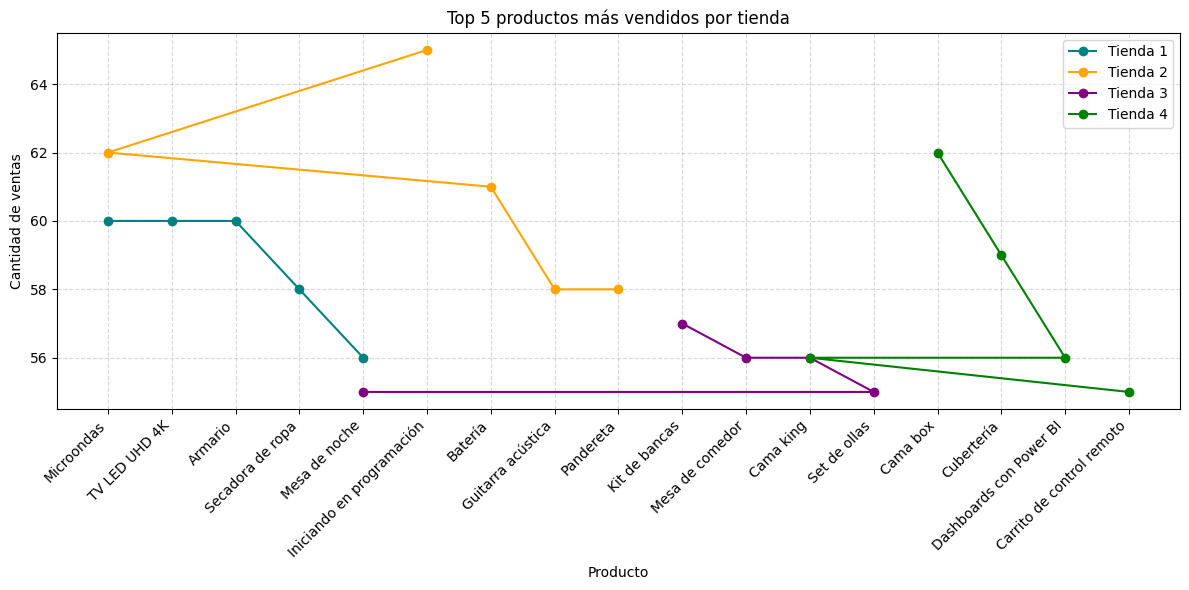

In [8]:
def productos_mas_y_menos_vendidos(t1, t2, t3, t4, top_n=5):
    tiendas = [t1, t2, t3, t4]
    nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    colores = ['teal', 'orange', 'purple', 'green']
    conteos = {}

    # Analizamos cada tienda
    for i, tienda in enumerate(tiendas):
        conteo = tienda['Producto'].value_counts()
        mas_vendido = conteo.idxmax()
        menos_vendido = conteo.idxmin()
        print(f"{nombres_tiendas[i]}")
        print(f"Producto más vendido: {mas_vendido} ({conteo.max()} ventas)")
        print(f"Producto menos vendido: {menos_vendido} ({conteo.min()} ventas)\n")
        conteos[nombres_tiendas[i]] = conteo.head(top_n)

    # Creamos el gráfico de líneas
    plt.figure(figsize=(12, 6))
    for i, nombre in enumerate(nombres_tiendas):
        top = conteos[nombre]
        plt.plot(top.index, top.values, marker='o', linestyle='-', label=nombre, color=colores[i])

    plt.title(f"Top {top_n} productos más vendidos por tienda")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad de ventas")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

productos_mas_y_menos_vendidos(tienda, tienda2, tienda3, tienda4)

# 5. Envío promedio por tienda

Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


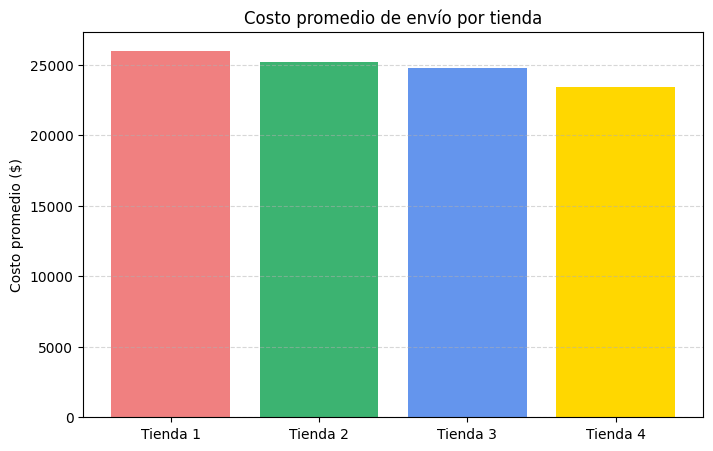

{'Tienda 1': np.float64(26018.61),
 'Tienda 2': np.float64(25216.24),
 'Tienda 3': np.float64(24805.68),
 'Tienda 4': np.float64(23459.46)}

In [22]:
def envio_promedio(t1, t2, t3, t4):
    # Calculamos promedio
    prom1 = t1['Costo de envío'].mean()
    prom2 = t2['Costo de envío'].mean()
    prom3 = t3['Costo de envío'].mean()
    prom4 = t4['Costo de envío'].mean()

    # Almacenamos datos
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envios = [prom1, prom2, prom3, prom4]
    print("Tienda 1: {:.2f}".format(prom1))
    print("Tienda 2: {:.2f}".format(prom2))
    print("Tienda 3: {:.2f}".format(prom3))
    print("Tienda 4: {:.2f}".format(prom4))

    # Gráfico de barras
    plt.figure(figsize=(8,5))
    colores = ['lightcoral', 'mediumseagreen', 'cornflowerblue', 'gold']
    plt.bar(nombres, envios, color=colores)

    # Estética
    plt.title("Costo promedio de envío por tienda")
    plt.ylabel("Costo promedio ($)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    return dict(zip(nombres, [round(p, 2) for p in envios]))

envio_promedio(tienda, tienda2, tienda3, tienda4)

6. Análisis del desempeño geográfico

        lat       lon
0   4.60971 -74.08175
1   6.25184 -75.56359
2  10.39972 -75.51444
3   3.43722 -76.52250
4   6.25184 -75.56359
       lat       lon
0  6.25184 -75.56359
1  6.25184 -75.56359
2  4.81333 -75.69611
3  3.43722 -76.52250
4  4.60971 -74.08175
        lat       lon
0  11.24079 -74.19904
1   3.43722 -76.52250
2   4.60971 -74.08175
3  10.96854 -74.78132
4   4.60971 -74.08175
       lat       lon
0  4.60971 -74.08175
1  7.89391 -72.50782
2  6.25184 -75.56359
3  6.25184 -75.56359
4  4.60971 -74.08175


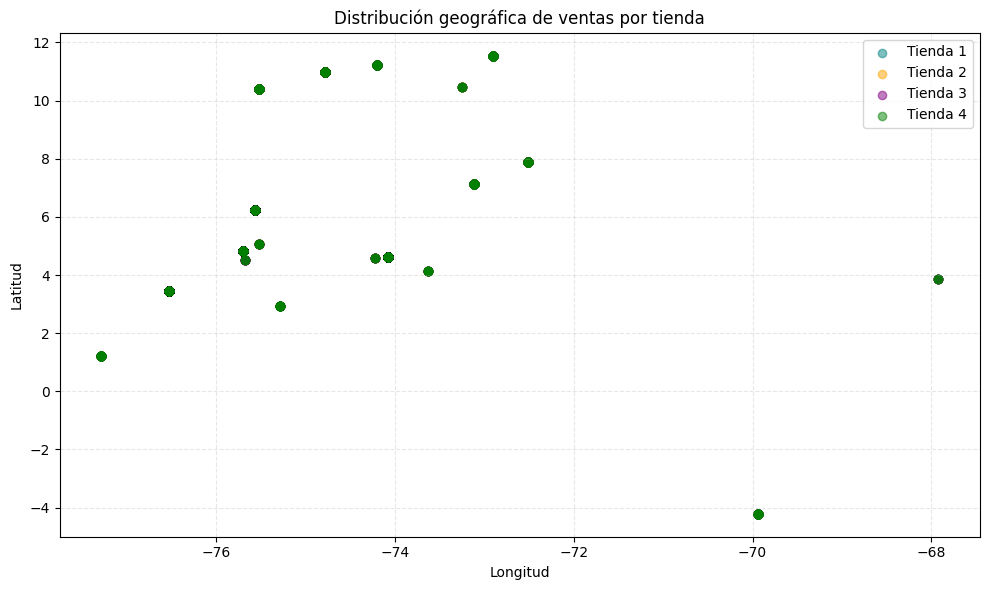

In [10]:
def mapa_ventas_geograficas(t1, t2, t3, t4):
    # Crear figura
    plt.figure(figsize=(10, 6))

    # Graficar cada tienda
    plt.scatter(t1['lon'], t1['lat'], alpha=0.5, label='Tienda 1', color='teal')
    plt.scatter(t2['lon'], t2['lat'], alpha=0.5, label='Tienda 2', color='orange')
    plt.scatter(t3['lon'], t3['lat'], alpha=0.5, label='Tienda 3', color='purple')
    plt.scatter(t4['lon'], t4['lat'], alpha=0.5, label='Tienda 4', color='green')

    print(tienda[['lat', 'lon']].head())
    print(tienda2[['lat', 'lon']].head())
    print(tienda3[['lat', 'lon']].head())
    print(tienda4[['lat', 'lon']].head())


    # Títulos y leyenda
    plt.title('Distribución geográfica de ventas por tienda')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

mapa_ventas_geograficas(tienda, tienda2, tienda3, tienda4)

In [11]:
pip install folium

import folium

# Crear un mapa base centrado en un punto promedio (ajustable)
m = folium.Map(location=[10, -75], zoom_start=5)  # Ajusta lat/lon según tus datos

# Función para añadir puntos al mapa
def agregar_tienda_al_mapa(df, nombre, color):
    for _, row in df.iterrows():
        if not pd.isna(row['lat']) and not pd.isna(row['lon']):
            folium.CircleMarker(
                location=[row['lat'], row['lon']],
                radius=5,
                color=color,
                fill=True,
                fill_opacity=0.7,
                popup=f"{nombre}",
            ).add_to(m)

# Añadir todas las tiendas con diferentes colores
agregar_tienda_al_mapa(tienda, "Tienda 1", "blue")
agregar_tienda_al_mapa(tienda2, "Tienda 2", "orange")
agregar_tienda_al_mapa(tienda3, "Tienda 3", "purple")
agregar_tienda_al_mapa(tienda4, "Tienda 4", "green")

# Mostrar el mapa
m


SyntaxError: invalid syntax (<ipython-input-11-d8a71ea1b1f7>, line 1)